In [9]:
import pandas as pd
import numpy as np
import os

RANDOM_STATE = 404

In [10]:
df = pd.read_csv('data/cardio_train.csv', delimiter=';')
df.drop(columns=['id'], inplace=True)
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
X = df.drop(columns=['cardio'])
y = df['cardio']

In [12]:
# Create an empty dictionary to store the results after each method
results_dict = {}

## Data manipulation

#### Standardization

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Select columns to be scaled
numeric_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'gender', 'cholesterol']
categorical_columns = ['gluc', 'smoke', 'alco', 'active']

# Fit and transform your data (only for numeric columns)
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Apply one-hot encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])

X.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,-0.436062,1.364055,0.443452,-0.847873,-0.122182,-0.088238,-0.539322,0,0,0,1
1,0.307686,-0.733108,-1.018168,0.749831,0.072610,-0.035180,2.400793,0,0,0,1
2,-0.247997,-0.733108,0.078047,-0.708942,0.007679,-0.141297,2.400793,0,0,0,0
3,-0.748152,1.364055,0.565254,0.541435,0.137541,0.017879,-0.539322,0,0,0,1
4,-0.808543,-0.733108,-1.018168,-1.264666,-0.187113,-0.194356,-0.539322,0,0,0,0


In [14]:
X.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
count,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,70000.000000,70000.000000,70000.000000,70000.000000
mean,5.272227e-16,-1.644399e-16,1.450116e-15,-2.905105e-16,7.623108e-17,1.745905e-17,1.381498e-16,0.226457,0.088129,0.053771,0.803729
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,0.572270,0.283484,0.225568,0.397179
min,-3.514407e+00,-7.331083e-01,-1.332014e+01,-4.460075e+00,-1.810381e+00,-8.841161e-01,-5.393221e-01,0.000000,0.000000,0.000000,0.000000
25%,-7.315341e-01,-7.331083e-01,-6.527630e-01,-6.394770e-01,-5.725127e-02,-8.823850e-02,-5.393221e-01,0.000000,0.000000,0.000000,1.000000
50%,9.489744e-02,-7.331083e-01,7.804703e-02,-1.532192e-01,-5.725127e-02,-8.823850e-02,-5.393221e-01,0.000000,0.000000,0.000000,1.000000
75%,7.531244e-01,1.364055e+00,6.870554e-01,5.414349e-01,7.261016e-02,-3.517999e-02,9.307354e-01,0.000000,0.000000,0.000000,1.000000
max,1.720199e+00,1.364055e+00,1.043119e+01,8.738353e+00,1.031826e+02,5.785165e+01,2.400793e+00,2.000000,1.000000,1.000000,1.000000


#### Visualization

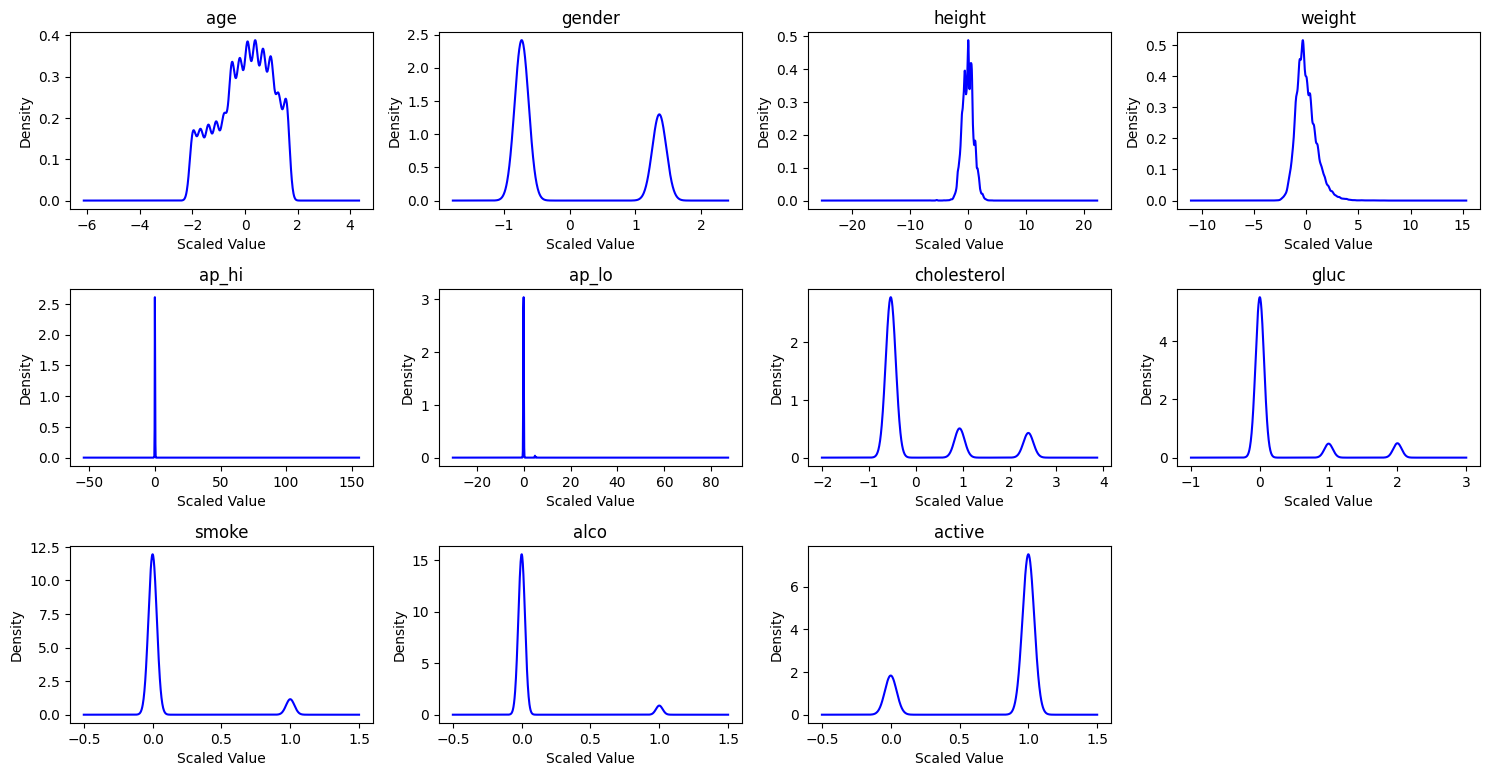

In [16]:
import matplotlib.pyplot as plt

# Set the size of the figure
plt.figure(figsize=(15, 10))

# Loop through each column in X and generate a density plot
for i, feature_name in enumerate(X.columns):
    # Set the subplot and plot the density of the column
    plt.subplot(4, 4, i + 1)  # 4x4 grid, current subplot index
    X[feature_name].plot(kind='density', color='blue', label=feature_name)
    plt.title(feature_name)
    plt.xlabel('Scaled Value')
    plt.ylabel('Density')

# Adjust the layout of the subplots
plt.tight_layout()

# Save the figure as an image
plt.savefig('images/density_plots_without_missingness.png')

# Display the figure
plt.show()

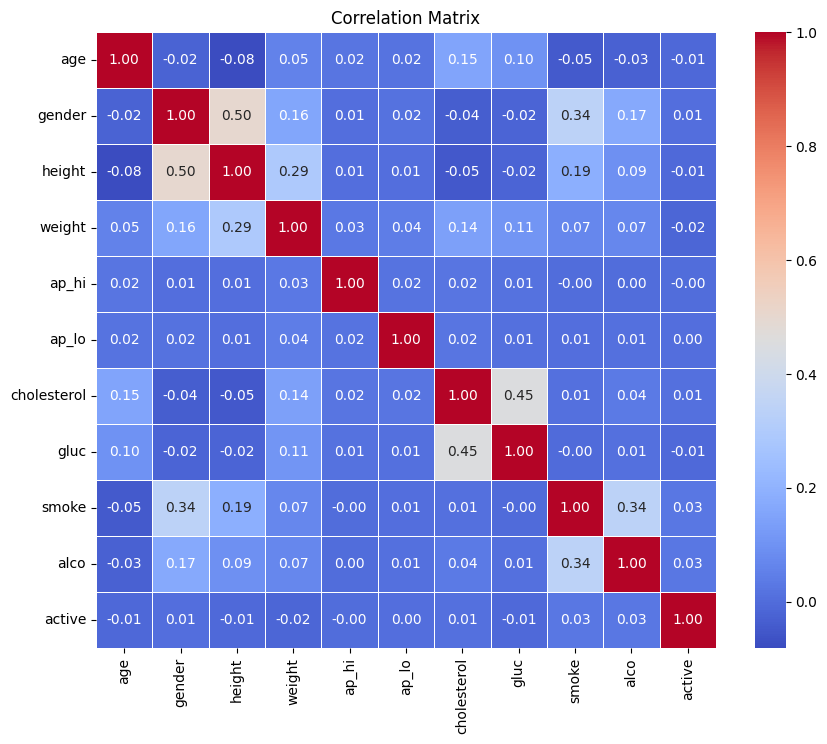

In [17]:
import seaborn as sns

# Set the size of the figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')

# Save the figure as an image
plt.savefig('images/correlation_matrix_without_missingness.png')

# Display the figure
plt.show()

#### Splitting

In [7]:
from sklearn.model_selection import train_test_split

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)
X_train.shape, X_test.shape

((52500, 11), (17500, 11))

## Preparing 10 subsets with removed features

In [8]:
# Function that randomly removes features and replace their values with NaN
def remove_features(num_features_to_remove=None, feature_indices_to_remove=None):
    """
    Randomly removes features from a subset of data and replaces their values with NaN.
    
    Parameters:
        num_features_to_remove (int): Number of features to remove randomly.
        feature_indices_to_remove (array-like): Indices of features to remove.
        
    Returns:
        pandas.DataFrame: Subset of data with removed features and NaN values.
    """
    # Sample a subset of data
    subset = X_train.sample(frac=0.001, random_state=RANDOM_STATE)
    
    # Determine features to remove based on number or indices provided
    if feature_indices_to_remove is None:
        if num_features_to_remove is None:
            num_features_to_remove = np.random.randint(1, min(5, len(X_train.columns) - 1))
        features_to_remove = np.random.choice(subset.columns[:-1], num_features_to_remove, replace=False)
    else:
        features_to_remove = subset.columns[feature_indices_to_remove]
    
    # Replace values of selected features with NaN
    features_to_remove = np.random.choice(subset.columns[:-1], num_features_to_remove, replace=False)
    subset = subset.astype(object)
    subset.loc[:, features_to_remove] = np.nan
    
    return subset

list_of_subsets = []
subset_without_changes = X_train.sample(frac=0.001, random_state=RANDOM_STATE)

# Generate subsets with varying numbers of removed features
for _ in range(2):
    list_of_subsets.append(remove_features(1))

for _ in range(2):
    list_of_subsets.append(remove_features(2))

for _ in range(2):
    list_of_subsets.append(remove_features(3))

for _ in range(2):
    list_of_subsets.append(remove_features(4))

for _ in range(2):
    list_of_subsets.append(remove_features(np.random.randint(5, 7)))

# Print information about subsets and their missing columns
print(f'Subsets with {list_of_subsets[0].shape[0]} datapoints and their columns with missing values:')
for subset_index, current_row in enumerate(list_of_subsets):
    nan_columns = current_row.columns[current_row.isnull().all()]
    print(f"Subset {subset_index+1}: {', '.join(nan_columns)}")

Subsets with 52 datapoints and their columns with missing values:
Subset 1: weight
Subset 2: ap_lo
Subset 3: weight, ap_hi
Subset 4: ap_hi, alco
Subset 5: height, ap_hi, gluc
Subset 6: ap_lo, cholesterol, alco
Subset 7: age, gender, smoke, alco
Subset 8: age, height, smoke, alco
Subset 9: age, weight, ap_hi, ap_lo, cholesterol, gluc
Subset 10: gender, ap_hi, ap_lo, gluc, smoke, alco


## Shared functions

#### Imputation

In [ ]:
from sklearn.impute import SimpleImputer
from ConditionalGMM.condGMM import CondGMM
import json

def imputing_missing_data(subsets, method='simple', number_of_samples=10, model=None):
    """
    Impute missing data in subsets using different imputation methods.
    
    Parameters:
        subsets (list): List of subsets of data.
        method (str): Imputation method ('simple', 'multivariate', 'cgmm', or 'vae').
        model: Trained model for certain imputation methods.
    """
    for subset in subsets:
        if method == 'simple':
            # Simple Imputer
            generated_data = simple_impute(subset)
            continue
        
        # Initialize to keep track of actual row index, because indices were shuffled
        row_in_subset_index = 0
        
        for row_index, row in subset.iterrows():
            # Get indices of unknown features
            missing_features_indices = [row.index.get_loc(col) for col in row.index if pd.isna(row[col])]
            
            # If all features are known, continue
            if len(missing_features_indices) == 0:
                continue
            
            generated_data = None
            
            if method == 'multivariate' or method == 'cgmm':
                # Multivariate Imputer or Conditional GMM
                generated_data = cgmm_impute(model, missing_features_indices, row, number_of_samples)
            elif method == 'vae':
                # Variational AutoEncoder
                generated_data = vae_impute(model, missing_features_indices, row, number_of_samples)
            
            # Update unknown features with sampled data
            for feature_index in range(len(missing_features_indices)):
                if subset.columns[missing_features_indices[feature_index]] in categorical_columns:
                    # Approximate categorical values to the nearest whole number
                    generated_data[:, feature_index] = np.round(generated_data[:, feature_index])
                subset.iloc[row_in_subset_index, missing_features_indices[feature_index]] = json.dumps([generated_data[sample_index][feature_index] for sample_index in range(generated_data.shape[0])])
            
            row_in_subset_index += 1

def simple_impute(current_subset):
    """
    Impute missing values using SimpleImputer with mean strategy.

    Parameters:
        current_subset (pandas.DataFrame): Subset of data with missing values.

    This function iterates over each column in the given DataFrame and imputes missing values using
    the SimpleImputer class from scikit-learn. The imputer is initialized with the 'mean' strategy,
    which replaces missing values with the mean of the non-missing values in the column.
    """

    # Create a SimpleImputer object with 'mean' strategy
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')

    # Iterate over each column in the DataFrame
    for col in current_subset.columns:
        # Check if any values in the column are missing
        if pd.isna(current_subset[col]).any():
            # Fit the imputer to the non-missing values in the column
            imp.fit(X_train[[col]])
            # Transform the missing values in the column
            current_subset[col] = imp.transform(current_subset[[col]])


def cgmm_impute(gmm, missing_features_indices, current_row, number_of_samples):
    """
    Impute missing values using Conditional GMM.
    
    Parameters:
        gmm (GMM): Gaussian Mixture Model.
        missing_features_indices (list): Indices of missing features.
        current_row (pandas.Series): Current row with missing values.
        number_of_samples (int): Number of samples to generate.
        
    Returns:
        numpy.ndarray: Generated data with imputed missing values.
    """
    # Find indices of known features
    known_features_indices = [i for i in range(len(current_row))  # Iterate over indices
                               if i not in missing_features_indices]  # Check if index is in missing_features_indices
    
    # Extract values of known features for the given row
    known_features_values = current_row[known_features_indices]
    
    # Initialize CondGMM
    cGMM = CondGMM(gmm.weights_, gmm.means_, gmm.covariances_, known_features_indices)
    
    # Generate samples using Conditional GMM
    generated_data = cGMM.rvs(known_features_values, size=number_of_samples, random_state=RANDOM_STATE)
    
    return generated_data


def vae_impute(model, missing_features_indices, current_row, number_of_samples):
    """
    Impute missing values using a Variational Autoencoder.

    Args:
        model (keras.Model): Trained Variational Autoencoder model.
        missing_features_indices (list): Indices of missing features.
        current_row (pandas.Series): Current row with missing values.
        number_of_samples (int): Number of samples to generate.

    Returns:
        list: Generated data with imputed missing values.
    """
    generated_data = np.empty((number_of_samples, len(missing_features_indices)))
    
    # Repeat the prediction process for the specified number of samples
    for _ in range(number_of_samples):
        # Impute missing values for each feature index
        # Reshape the missing values to a 2D array with one row and all missing features
        missing_features_values = model.predict(current_row.values.reshape(1, -1).astype(np.float32), verbose=0)
        
        # Append the generated data to the list
        generated_data = np.append(generated_data, missing_features_values[:, missing_features_indices], axis=0)
    
    return generated_data

#### Scoring

In [ ]:
import json

def get_scoring(subsets, method='simple', print_results=False):
    """
    Calculate Mean Squared Error (MSE) scores for features in subsets of data.
    
    Parameters:
        subsets (list): List of subsets of data.
        method (str): Method used for imputation ('simple', 'multivariate', 'cgmm', or 'vae').
        print_results (bool): Whether to print MSE scores or not.
        
    Returns:
        dict: Dictionary containing MSE scores for each feature in the subsets.
    """    
    method = method.lower()
    if method != 'simple':
        # Convert serialized arrays in each subset to lists
        for subset in subsets:
            for col in subset.columns:
                subset[col] = subset[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
    
    # Iterate through subsets
    for subset_index, subset in enumerate(subsets):
        feature_score = {}  # Initialize dictionary to store MSE values
        
        # Determine unknown features indexes dynamically for each subset
        if method == 'simple':
            missing_features_indices = [col_index for col_index, col in enumerate(list_of_subsets[subset_index].columns) if list_of_subsets[subset_index][col].isnull().all()]
        else:
            missing_features_indices = [col_index for col_index, col in enumerate(subset.columns) if subset[col].apply(lambda x: isinstance(x, list)).any()]

        if not missing_features_indices:
            continue  # Skip if there are no missing values
        
        # Iterate through rows in the subset DataFrame
        for index, row in subset.iterrows():
            original_values = X.iloc[index, missing_features_indices].values
            
            # Compute MSE for each feature separately
            for feature_index in range(len(missing_features_indices)):
                if method == 'simple':
                    generated_samples = [row.iloc[missing_features_indices].values[feature_index]]
                else:
                    try:
                        generated_samples_raw = row.iloc[missing_features_indices].values[feature_index]
                        generated_samples = [sample for sample in generated_samples_raw if not pd.isna(sample)]
                    except Exception as e:
                        # TODO: Add handling for exceptions
                        print(f"Error processing row {index}: {e}")
                        continue
                
                # Grab the original value of the feature
                original_value = original_values[feature_index]
                
                for sample in generated_samples:
                    squared_error = (original_value - sample)**2
                    
                    if missing_features_indices[feature_index] not in feature_score:
                        feature_score[missing_features_indices[feature_index]] = []
                        
                    feature_score[missing_features_indices[feature_index]].append(squared_error)
        
        for feature_index, score_values in feature_score.items():
            mse = np.mean(score_values)
            
            # TODO: Not sure if it should be X, X_train, or subset_without_changes
            variance = np.var(subset_without_changes.iloc[:, feature_index])
            nmse = mse / variance
            feature_score[feature_index] = nmse
        
        # Print MSE scores if required
        if print_results:
            print(f"MSE for Subset {subset_index + 1}:")
            for feature_index, score_values in feature_score.items():
                print(f"Feature {subset_without_changes.columns[feature_index]}: MSE = {score_values}")
    
    # Return dictionary containing MSE scores
    return feature_score

#### Classification

In [ ]:
from joblib import load
from sklearn.metrics import accuracy_score
import warnings

warnings.filterwarnings('ignore', message="X does not have valid feature names")

# Load the trained classifier model
classifier = load('classifiers\cardio_classifier.h5')

def get_accuracy(subsets, method='simple', should_print=False):
    """
    Calculate accuracy scores for subsets of data using a trained classifier.
    
    Parameters:
        subsets (list): List of subsets of data.
        method (str): Method used for imputation ('simple', 'multivariate', or 'cgmm').
        should_print (bool): Whether to print accuracy scores or not.
        
    Returns:
        list: List of accuracy scores for each subset.
    """
    method = method.lower()
    
    if method != 'simple':
        # Convert serialized arrays in each subset to lists
        for subset in subsets:
            for col in subset.columns:
                subset[col] = subset[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
    
    classification_results = []  # Initialize list to store classification results
    accuracy_per_subset = []  # Initialize list to store accuracy scores

    # Iterate through subsets
    for subset_index, subset in enumerate(subsets):
        subset_results = []  # Initialize list to store results for the current subset
        
        # Iterate through rows in the subset DataFrame
        for row_index, row in subset.iterrows():
            row_results = []  # Initialize list to store results for the current row
            
            # Process each row based on the method used
            if method != 'simple':
                serialized_arrays = []
                non_serialized_values = []
                
                number_of_samples = 1
                
                # Split row values into serialized arrays and non-serialized values
                for col, value in row.items():
                    if isinstance(value, list):
                        serialized_arrays.append((col, value))
                        if number_of_samples < len(value):
                            number_of_samples = len(value)
                    else:
                        non_serialized_values.append((col, value))
                
                # Generate combined rows by combining serialized arrays with non-serialized values
                for i in range(number_of_samples):
                    combined_row = non_serialized_values.copy()
                    
                    for col, serialized_array in serialized_arrays:
                        if i < len(serialized_array):
                            combined_row.append((col, serialized_array[i]))
                    
                    combined_row_array = [value for _, value in combined_row]
                    
                    try:
                        result_array = classifier.predict([combined_row_array], verbose=0)
                        row_results.append(result_array)
                    except Exception as e:
                        print(f"Error processing row {row_index}: {e}")
            else:
                # For simple method, predict directly from row values
                result_array = classifier.predict([row.values.tolist()], verbose=0)
                row_results.append(result_array)

            subset_results.append(row_results)  # Append results for the current row to the subset results
        
        classification_results.append(subset_results)  # Append subset results to the classification results

    # Calculate accuracy scores for each subset
    for subset_index, subset_results in enumerate(classification_results):
        true_labels = y.loc[subsets[subset_index].index]  # Get true labels for the current subset
        
        subset_predicted_labels = []  # Initialize list to store predicted labels for the subset
        
        # Determine predicted labels for each row in the subset
        for row_results in subset_results:
            predicted_label = 1 if row_results[0] > 0.5 else 0  # Assuming threshold of 0.5
            subset_predicted_labels.append(predicted_label)
        
        subset_accuracy = accuracy_score(true_labels, subset_predicted_labels)  # Calculate accuracy score for the subset
        accuracy_per_subset.append(round(subset_accuracy * 100, 2))  # Append accuracy score to the list

    # Print accuracy scores if required
    if (should_print):
        for subset_index, subset_accuracy in enumerate(accuracy_per_subset):
            print("Subset", subset_index+1, "accuracy:", subset_accuracy)
        
    return accuracy_per_subset  # Return list of accuracy scores for each subset


## SimpleImputer with mean strategy

#### Preparation

In [ ]:
import copy

imputer_subsets = copy.deepcopy(list_of_subsets)

#### Imputation

In [ ]:
imputing_missing_data(imputer_subsets, 'simple')

imputer_subsets[0].head(5)

#### Scoring

In [ ]:
simple_imputer_score = get_scoring(imputer_subsets, 'simple')

#### Classification

In [ ]:
simple_imputer_accuracy = get_accuracy(imputer_subsets, 'simple', True)

In [ ]:
results_dict['simple_imputer'] = {'score': simple_imputer_score, 'accuracy': simple_imputer_accuracy}

## Multivariate normal distribution

#### Preparation

In [ ]:
multivariate_subsets = copy.deepcopy(list_of_subsets)

In [ ]:
from sklearn.mixture import GaussianMixture

# Create Gaussian Mixture Model with a single component
gmm = GaussianMixture(n_components=1, random_state=RANDOM_STATE)
gmm.fit(X_train)

#### Imputation

In [ ]:
imputing_missing_data(multivariate_subsets, 'multivariate', 10, gmm)

multivariate_subsets[0].head(5)

#### Scoring

In [ ]:
multivariate_score = get_scoring(multivariate_subsets, 'multivariate')

#### Classification

In [ ]:
multivariate_accuracy = get_accuracy(multivariate_subsets, 'multivariate', True)

In [ ]:
results_dict['multivariate'] = {'score': multivariate_score, 'accuracy': multivariate_accuracy}

## Conditional GMM

#### Preparation

In [ ]:
cgmm_subsets = copy.deepcopy(list_of_subsets)

In [ ]:
import matplotlib.pyplot as plt

def compute_bic(data, n_components_range):
    """
    Computes the Bayesian Information Criterion (BIC) for Gaussian Mixture Models
    with different numbers of components.

    Parameters:
        data (array-like): Input data.
        n_components_range (range): Range of number of components to evaluate.

    Returns:
        list: BIC values for each number of components.
    """
    # List to store BIC values
    bic = []
    
    # Loop through number of components and compute BIC for each
    for n_components in n_components_range:
        # Create Gaussian Mixture Model with specified number of components
        gmm = GaussianMixture(n_components=n_components, random_state=RANDOM_STATE)
        gmm.fit(data)  # Fit the model to the data
        bic.append(gmm.bic(data))  # Calculate BIC and add to list
    
    return bic  # Return list of BIC values


def find_elbow_point(bic_values):
    """
    Finds the index where the differences between consecutive BIC values start to decrease.

    Parameters:
        bic_values (list): List of BIC values for different number of components.

    Returns:
        int: Index of elbow point.
    """
    # Compute differences between consecutive BIC values
    differences = np.diff(bic_values)
    
    # Find the index where differences start to decrease
    elbow_point_index = np.argmax(differences < 0) + 1
    
    return elbow_point_index


# Range of number of components to evaluate
n_components_range = range(1, 31)

# Compute BIC values
bic_values = compute_bic(df.drop(columns=['cardio']), n_components_range)

# Find elbow point
elbow_point_index = find_elbow_point(bic_values)

# Optimal number of components based on elbow point
optimal_n_components = n_components_range[elbow_point_index]

# Plotting BIC values
plt.plot(n_components_range, bic_values, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Value')
plt.title('BIC for Gaussian Mixture Models')
plt.grid(True)

# Highlighting the elbow point
plt.axvline(x=optimal_n_components, color='r', linestyle='--', label='Elbow Point')

plt.legend()
plt.savefig('images/BIC_without_missingness.png')
plt.show()

# Print optimal number of components
print("Optimal number of components based on elbow point:", optimal_n_components)

# TODO: Discuss using elbow method as it always lands on 2 components
optimal_n_components = 2

In [ ]:
# Create Gaussian Mixture Model with optimal number of components
gmm = GaussianMixture(n_components=optimal_n_components, random_state=RANDOM_STATE)
gmm.fit(X_train)

#### Imputation

In [ ]:
imputing_missing_data(cgmm_subsets, 'cgmm', 10, gmm)

cgmm_subsets[0].head(5)

#### Scoring

In [ ]:
cgmm_score = get_scoring(cgmm_subsets, 'cgmm')

#### Classification

In [ ]:
cgmm_accuracy = get_accuracy(cgmm_subsets, 'cgmm', True)

In [ ]:
results_dict['cgmm'] = {'score': cgmm_score, 'accuracy': cgmm_accuracy}

## Variational Autoencoder

#### Preparation

In [ ]:
vae_subsets = copy.deepcopy(list_of_subsets)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda # type: ignore
from tensorflow.keras.models import Model # type: ignore

latent_dim = 4

input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,))
encoded = inputs
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
z_mean = Dense(latent_dim)(encoded)
z_log_var = Dense(latent_dim)(encoded)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], latent_dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

# Define the decoder
decoded = z
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
outputs = Dense(input_dim)(decoded)

# Create the VAE model
vae = Model(inputs, outputs)

# Compile the model
vae.compile(optimizer='adam', loss='mse')  # Use MSE as the reconstruction loss

# Train the model
history = vae.fit(X_train, X_train, epochs=10, batch_size=32, verbose=1)

#### Imputation

In [ ]:
imputing_missing_data(vae_subsets, 'vae', 10, vae)

vae_subsets[0].head(5)

#### Scoring

In [ ]:
vae_score = get_scoring(vae_subsets, 'vae')

#### Classification

In [ ]:
vae_accuracy = get_accuracy(vae_subsets, 'vae', True)

In [ ]:
results_dict['vae'] = {'score': vae_score, 'accuracy': vae_accuracy}

## Comparison of results

In [ ]:
from tabulate import tabulate

# Convert accuracy values to percentages
for key, value in results_dict.items():
    results_dict[key]["accuracy"] = [round(acc * 100, 2) for acc in value["accuracy"]]

# Create a table
table = [[""] + list(results_dict.keys())]
for i in range(10):
    table.append([i+1] + [results_dict[key]["accuracy"][i] for key in results_dict.keys()])

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="grid"))